#### 0 - Setup 

In [142]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from datetime import date, timedelta

#### 1 - Load data

In [143]:
cwd = os.getcwd()
print(cwd)

/Users/ndeen/git/flu_forecasting


In [144]:
folder_path = cwd+r'/data'

# Open the folder
files = os.listdir(folder_path)

file_names = []
# Print the file names
for file in files:
    print(file)
    file_names.append(file)

flu.csv
WHO_NREVSS_Clinical_Labs.csv
WHO_NREVSS_Public_Health_Labs.csv
cold.csv
musclepain.csv
muscleache.csv
chills.csv
commoncold.csv
ILINet.csv
fever.csv
runnynose.csv


In [145]:
folder_path+'/'+file_names[0]

'/Users/ndeen/git/flu_forecasting/data/flu.csv'

In [146]:
# cdc flu data (40th week of 2015 - 42nd week of 2022)
clinical_labs = pd.read_csv(folder_path+'/'+file_names[1], header=1)
publichealth_labs = pd.read_csv(folder_path+'/'+file_names[2], header=1)
ilinet = pd.read_csv(folder_path+'/'+file_names[8], header=1)

In [147]:
# CDC MMWR counts
clinical_labs.head()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
0,States,Massachusetts,2015,40,259,1,2,1.16,0.39,0.77
1,States,Massachusetts,2015,41,256,1,1,0.78,0.39,0.39
2,States,Massachusetts,2015,42,244,0,1,0.41,0.00,0.41
3,States,Massachusetts,2015,43,231,0,1,0.43,0.00,0.43
4,States,Massachusetts,2015,44,273,0,0,0.00,0.00,0.00


In [148]:
clinical_labs.describe()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,2018.779891,26.690217,817.122283,58.076087,24.404891,6.242908,4.221821,2.021168
std,2.059848,15.066852,656.366236,114.410488,71.492776,9.606568,6.908198,4.268317
min,2015.000000,1.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,14.000000,295.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,27.000000,623.000000,2.000000,1.000000,1.050000,0.680000,0.050000
75%,2021.000000,40.000000,1146.500000,40.000000,7.000000,8.885000,4.985000,1.157500
max,2022.000000,53.000000,3303.000000,644.000000,569.000000,40.450000,28.680000,25.970000


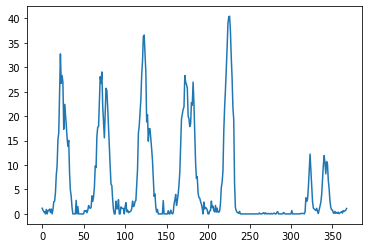

In [149]:
# Select the columns to plot
x = clinical_labs.index
y = clinical_labs['PERCENT POSITIVE']
plt.plot(x, y) # Plot the data
plt.show() # Show the plot

In [150]:
# yearly counts
publichealth_labs.head(20)

,REGION TYPE,REGION,SEASON_DESCRIPTION,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
0,States,Massachusetts,Season 2015-16,356,146,8,0,6,25,9,0
1,States,Massachusetts,Season 2016-17,485,6,312,0,1,0,4,0
2,States,Massachusetts,Season 2017-18,491,31,156,0,2,0,2,0
3,States,Massachusetts,Season 2018-19,828,432,166,11,3,0,0,0
4,States,Massachusetts,Season 2019-20,681,324,30,1,20,5,0,0
5,States,Massachusetts,Season 2020-21,564,0,0,0,0,0,0,0
6,States,Massachusetts,Season 2021-22,752,0,155,3,0,0,0,0
7,States,Massachusetts,Season 2022-23,17,0,3,0,0,0,0,0


In [151]:
publichealth_labs.describe()

,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
count,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.0
mean,521.750000,117.375000,103.750000,1.875000,4.00000,3.750000,1.875000,0.0
std,255.927306,170.586331,112.199758,3.833592,6.78233,8.762746,3.226564,0.0
min,17.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,452.750000,0.000000,6.750000,0.000000,0.00000,0.000000,0.000000,0.0
50%,527.500000,18.500000,92.500000,0.000000,1.50000,0.000000,0.000000,0.0
75%,698.750000,190.500000,158.500000,1.500000,3.75000,1.250000,2.500000,0.0
max,828.000000,432.000000,312.000000,11.000000,20.00000,25.000000,9.000000,0.0


In [152]:
ilinet.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,States,Massachusetts,2015,40,X,0.790429,X,X,X,X,X,X,185,44,23405
1,States,Massachusetts,2015,41,X,0.643767,X,X,X,X,X,X,134,43,20815
2,States,Massachusetts,2015,42,X,0.733375,X,X,X,X,X,X,177,44,24135
3,States,Massachusetts,2015,43,X,0.589921,X,X,X,X,X,X,142,41,24071
4,States,Massachusetts,2015,44,X,0.667916,X,X,X,X,X,X,164,44,24554


In [153]:
ilinet.describe()

,YEAR,WEEK,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,2018.779891,26.690217,1.430763,901.364130,76.298913,58170.494565
std,2.059848,15.066852,1.126326,1017.475734,44.773396,37139.782560
min,2015.000000,1.000000,0.333677,27.000000,12.000000,6273.000000
25%,2017.000000,14.000000,0.695498,287.750000,45.000000,28108.000000
50%,2019.000000,27.000000,1.014380,551.000000,60.000000,51021.000000
75%,2021.000000,40.000000,1.723775,1118.000000,92.000000,68488.500000
max,2022.000000,53.000000,6.614120,6300.000000,186.000000,164848.000000


In [154]:
# google search data (01/2015 - 10/2022)
google_flu = pd.read_csv(folder_path+'/'+file_names[0], header=1, names=['date','flu_count'])
google_cold = pd.read_csv(folder_path+'/'+file_names[3], header=1, names=['date','cold_count'])
google_musclepain = pd.read_csv(folder_path+'/'+file_names[4], header=1, names=['date','musclepain_count'])
google_muscleache = pd.read_csv(folder_path+'/'+file_names[5], header=1, names=['date','muscleache_count'])
google_chills = pd.read_csv(folder_path+'/'+file_names[6], header=1, names=['date','chills_count'])
google_commoncold = pd.read_csv(folder_path+'/'+file_names[7], header=1, names=['date','commoncold_count'])
google_fever = pd.read_csv(folder_path+'/'+file_names[9], header=1, names=['date','fever_count'])
google_runnynose = pd.read_csv(folder_path+'/'+file_names[10], header=1, names=['date','runnynose_count'])

In [155]:
google_cold.head()

,date,cold_count
0,2015-01,79
1,2015-02,66
2,2015-03,54
3,2015-04,51
4,2015-05,48


Steps: 

1. Get all the dates synced up (MMWR weeks to calendar dates - https://kmcconeghy.github.io/flumodelr/articles/02-data.html#mmwr-weeks)
2. Convert dates into categorical features (year, month, day)
3. Create the response variable

In [156]:
# create a function to identify the date range based on the MMWR week and year
def week_date_range(year, weeknum):
    jan4 = date(year, 1, 4)
    DofW = (jan4.weekday() + 1) % 7
    startweek = jan4 if DofW == 6 else jan4 - timedelta(days=DofW)
    d0 = startweek + timedelta(days=(weeknum - 1) * 7)
    d1 = startweek + timedelta(days=(weeknum - 1) * 7 + 6)
    return [d0.strftime("%Y-%m-%d"), d1.strftime("%Y-%m-%d")]

In [157]:
# preview column names
clinical_labs.head(0)

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B


In [158]:
# get the date range
clinical_labs['date_range'] = clinical_labs.apply(lambda x: week_date_range(x[2],x[3]), axis=1)
clinical_labs.head()


,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B,date_range
0,States,Massachusetts,2015,40,259,1,2,1.16,0.39,0.77,"[2015-10-04, 2015-10-10]"
1,States,Massachusetts,2015,41,256,1,1,0.78,0.39,0.39,"[2015-10-11, 2015-10-17]"
2,States,Massachusetts,2015,42,244,0,1,0.41,0.00,0.41,"[2015-10-18, 2015-10-24]"
3,States,Massachusetts,2015,43,231,0,1,0.43,0.00,0.43,"[2015-10-25, 2015-10-31]"
4,States,Massachusetts,2015,44,273,0,0,0.00,0.00,0.00,"[2015-11-01, 2015-11-07]"


In [159]:
# get the start and end date
clinical_labs['start_date'] = clinical_labs.apply(lambda x: x[-1][0], axis=1)
clinical_labs['end_date'] = clinical_labs.apply(lambda x: x[-2][1], axis=1) # be careful, you just added an extra column to the end of the dataset
clinical_labs.head()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B,date_range,start_date,end_date
0,States,Massachusetts,2015,40,259,1,2,1.16,0.39,0.77,"[2015-10-04, 2015-10-10]",2015-10-04,2015-10-10
1,States,Massachusetts,2015,41,256,1,1,0.78,0.39,0.39,"[2015-10-11, 2015-10-17]",2015-10-11,2015-10-17
2,States,Massachusetts,2015,42,244,0,1,0.41,0.00,0.41,"[2015-10-18, 2015-10-24]",2015-10-18,2015-10-24
3,States,Massachusetts,2015,43,231,0,1,0.43,0.00,0.43,"[2015-10-25, 2015-10-31]",2015-10-25,2015-10-31
4,States,Massachusetts,2015,44,273,0,0,0.00,0.00,0.00,"[2015-11-01, 2015-11-07]",2015-11-01,2015-11-07


In [165]:
# repeat the process for ilinet
# get the date range
ilinet['date_range'] = ilinet.apply(lambda x: week_date_range(x[2],x[3]), axis=1)
# get the start and end date
ilinet['start_date'] = ilinet.apply(lambda x: x[-1][0], axis=1)
ilinet['end_date'] = ilinet.apply(lambda x: x[-2][1], axis=1) # be careful, you just added an extra column to the end of the dataset
ilinet.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,date_range,start_date,end_date
0,States,Massachusetts,2015,40,X,0.790429,X,X,X,X,X,X,185,44,23405,"[2015-10-04, 2015-10-10]",2015-10-04,2015-10-10
1,States,Massachusetts,2015,41,X,0.643767,X,X,X,X,X,X,134,43,20815,"[2015-10-11, 2015-10-17]",2015-10-11,2015-10-17
2,States,Massachusetts,2015,42,X,0.733375,X,X,X,X,X,X,177,44,24135,"[2015-10-18, 2015-10-24]",2015-10-18,2015-10-24
3,States,Massachusetts,2015,43,X,0.589921,X,X,X,X,X,X,142,41,24071,"[2015-10-25, 2015-10-31]",2015-10-25,2015-10-31
4,States,Massachusetts,2015,44,X,0.667916,X,X,X,X,X,X,164,44,24554,"[2015-11-01, 2015-11-07]",2015-11-01,2015-11-07


In [167]:
# for public health labs, we need the year from the 'SEASON_DESCRIPTION'
publichealth_labs.head(1)

,REGION TYPE,REGION,SEASON_DESCRIPTION,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
0,States,Massachusetts,Season 2015-16,356,146,8,0,6,25,9,0


In [181]:
publichealth_labs['year'] = publichealth_labs['SEASON_DESCRIPTION'].apply(lambda x: x.split(' ')[1].split('-')[0])
publichealth_labs.head()

,REGION TYPE,REGION,SEASON_DESCRIPTION,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v,year
0,States,Massachusetts,Season 2015-16,356,146,8,0,6,25,9,0,2015
1,States,Massachusetts,Season 2016-17,485,6,312,0,1,0,4,0,2016
2,States,Massachusetts,Season 2017-18,491,31,156,0,2,0,2,0,2017
3,States,Massachusetts,Season 2018-19,828,432,166,11,3,0,0,0,2018
4,States,Massachusetts,Season 2019-20,681,324,30,1,20,5,0,0,2019
